In [1]:
import scipy.io
import numpy as np
import scipy.misc
from matplotlib import pyplot as plt
from PIL import Image
from scipy import fftpack, signal
from scipy.linalg import circulant
import sklearn
from sklearn.decomposition import PCA
import sklearn.neighbors
import cv2
import nir_ref

In [2]:
IMAGE_PATH = 'DIPSourceHW2.png'
RESULT_PATH = './output/'
SIZE = 256
WHITE_LEVEL = 255
ALPHA = 3

In [3]:
img = plt.imread(IMAGE_PATH)
img = np.array(img)
img = img[:, :, 0]
img = img / img.max()
img_new_size = np.zeros((img.shape[0]+2, img.shape[1]+2))
img_new_size[1:-1, 1:-1] = img
img = img_new_size

In [4]:
## define constants
alpha = 3
window_size = 15
filter_range_sinc = window_size/4  #was window_size/2. smaller range ==> wider gaussian,
filter_range_gaussian = window_size / 16
mu = 0
sigma = 1
T = 10

In [5]:
## generate filters
s_filter = nir_ref.__sinc__(256)
g_filter =  nir_ref.__gaussian_kernel__(256)

In [6]:
## generate low resolution images
sinc_img_big = signal.convolve2d(img, s_filter, mode='same', boundary='wrap')
sinc_img = nir_ref.downsample_shrink_matrix(sinc_img_big, alpha)
sinc_img_high_res = nir_ref.upsample_matrix(sinc_img, alpha)

gaussian_img_big = signal.convolve2d(img, g_filter, mode='same', boundary='wrap')
gaussian_img = nir_ref.downsample_shrink_matrix(gaussian_img_big, alpha)
gaussian_img_high_res = nir_ref.upsample_matrix(gaussian_img, alpha)

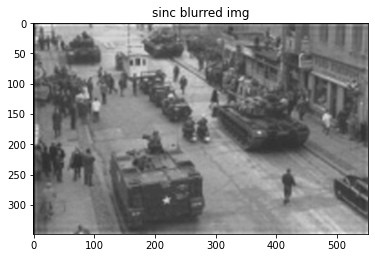

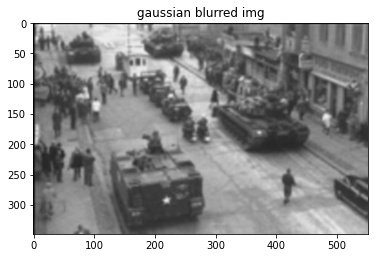

In [7]:
plt.imshow(sinc_img_high_res, cmap='gray')
plt.title("sinc blurred img")
plt.show()

plt.imshow(gaussian_img_high_res, cmap='gray')
plt.title("gaussian blurred img")
plt.show()

In [8]:
def plot_results(img_restored, blurred_with, restored_with, orig_img):
    plt.imshow(img_restored, cmap='gray')
    PSNR = nir_ref.calculate_psnr(orig_img[5:-5, 5:-5], img_restored[5:-5, 5:-5])
    plt.title(f'image blurred with {blurred_with} and restored with {restored_with}. PSNR={PSNR:.2f}')
    plt.show()


iteration number: 0
iteration number: 1
iteration number: 2
iteration number: 3
iteration number: 4
iteration number: 5
iteration number: 6
iteration number: 7
iteration number: 8
iteration number: 9
iteration number: 0
iteration number: 1
iteration number: 2
iteration number: 3
iteration number: 4
iteration number: 5
iteration number: 6
iteration number: 7
iteration number: 8
iteration number: 9


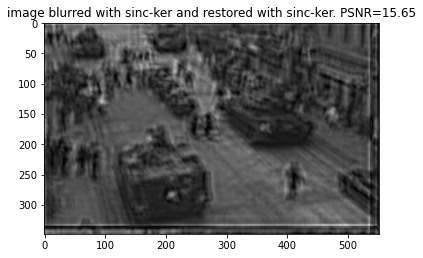

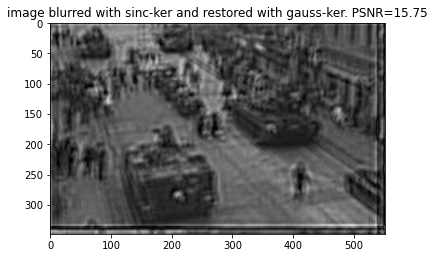

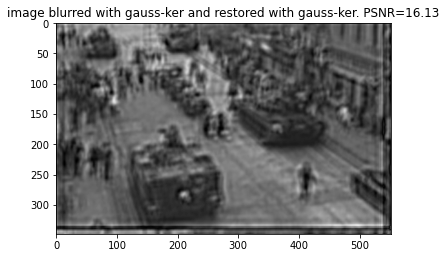

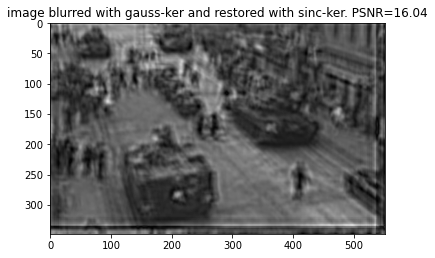

In [9]:
## restore kernels using Irani-Michaeli's paper's algorithm
gaussian_restored_k = nir_ref.calculate_kernel(gaussian_img, alpha,T) ## restored kernel after blurring with gaussian
sinc_restored_k = nir_ref.calculate_kernel(sinc_img, alpha, T) ## restored kernel after blurring with sinc

## restore each blurred image with both kernels
sinc_restored_img = nir_ref.wiener_filter(sinc_img_high_res, sinc_restored_k, 0.1)
sinc_blurred_restored_from_gaussian_img = nir_ref.wiener_filter(sinc_img_high_res, gaussian_restored_k, 0.1)
gaussian_restored_img= nir_ref.wiener_filter(gaussian_img_high_res, gaussian_restored_k, 0.1)
gaussian_blurred_restored_from_sinc_img = nir_ref.wiener_filter(gaussian_img_high_res, sinc_restored_k, 0.1)

## plot results and PSNR with original high-res image
plot_results(sinc_restored_img, "sinc-ker", "sinc-ker", img)
plot_results(sinc_blurred_restored_from_gaussian_img, "sinc-ker", "gauss-ker", img)
plot_results(gaussian_restored_img, "gauss-ker", "gauss-ker", img)
plot_results(gaussian_blurred_restored_from_sinc_img, "gauss-ker", "sinc-ker", img)
